In [3]:
import pandas as pd
import numpy as np
itemInfo = pd.read_csv('/tf/shared/item_info.csv', ' ')
itemInfo = itemInfo.sort_values(by = 'item_id')

# parse item_vec into 2D array
itemVecs = []
for i in range(itemInfo.shape[0]):
    item_vec = itemInfo.item_vec[i]
    item_vec = [float(x) for x in item_vec.split(',')]
    itemVecs.append(item_vec)

itemVecs = np.array(itemVecs)


In [2]:
# normalize all columns
from sklearn.preprocessing import normalize
itemVecs = normalize(itemVecs, axis = 0)

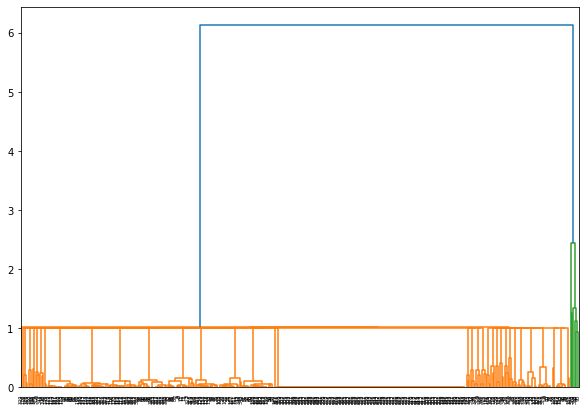

In [4]:
############# CLUSTERING #############################
# hierachical clustering
## draw dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

distance = linkage(itemVecs)
plt.figure(figsize=(10, 7))
dendrogram(distance,
            orientation='top')
plt.show()
# this dendrogram not very useful

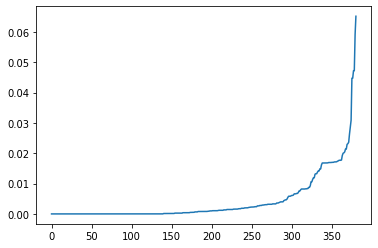

In [22]:
###################### Now try DBSCAN #########################
MIN_PTS = 4 # minimum number of members to form a cluster
from sklearn.neighbors import NearestNeighbors

# plot the elbow curve
# Calculate the average distance between each point in the data set and its MIN_PTS nearest neighbors
neighbors = NearestNeighbors(n_neighbors=MIN_PTS)
neighbors_fit = neighbors.fit(itemVecs)
distances, _ = neighbors_fit.kneighbors(itemVecs)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)


In [5]:
# so we pick eps = 0.02
EPS = 0.02
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = EPS, min_samples = 1)
dbscan.fit(itemVecs)
itemClusterLabels = dbscan.labels_

In [ ]:
for 

In [4]:
# print frequency table
import pandas as pd
import sys
tmp = pd.Series(itemClusterLabels)
FreqTable = tmp.value_counts()
FreqLabels = FreqTable.keys().tolist()
FreqCounts = FreqTable.tolist()
for i in range(len(FreqLabels)):
    print("{0:<3}: {1}".format(FreqLabels[i], FreqCounts[i]))

24 : 131
11 : 49
0  : 42
3  : 41
10 : 39
1  : 13
13 : 11
9  : 8
5  : 5
26 : 4
31 : 3
27 : 2
25 : 2
12 : 2
32 : 2
22 : 2
6  : 2
20 : 2
30 : 2
15 : 2
7  : 1
8  : 1
4  : 1
2  : 1
36 : 1
14 : 1
16 : 1
17 : 1
35 : 1
19 : 1
21 : 1
23 : 1
28 : 1
29 : 1
33 : 1
34 : 1
18 : 1


In [10]:
########## Cluster Analysis ##################
# calculate the probability that 2 items are purchased together given that they are in the same cluster
from DataPrep import getExposedItemsTrainSet
from tqdm import tqdm
recItems, purLabels = getExposedItemsTrainSet()

countSameCluster = 0    # denominator, count number of 2 items in the same cluster
countPurchaseAll = 0    # numerator, count number of 2 items purchased together and in same cluster

for i in tqdm(range(len(recItems))):
    Items = recItems[i]
    purch = purLabels[i]
    for j in range(9):
        for k in range(j, 9):
            if itemClusterLabels[Items[j]-1] == itemClusterLabels[Items[k]-1]:
                countSameCluster = countSameCluster + 1
                if purch[j]==1 and purch[k]==1:
                    countPurchaseAll = countPurchaseAll + 1

print('probability of same cluster purchased together = ' + str(countPurchaseAll/countSameCluster))

# probability that any 2 items are purchased together
countPurchaseAll = 0
countAll = 0 # all combinations of 2 items
for i in tqdm(range(len(recItems))):
    Items = recItems[i]
    purch = purLabels[i]
    for j in range(9):
        for k in range(j, 9):
            countAll = countAll + 1
            if purch[j]==1 and purch[k]==1:
                countPurchaseAll = countPurchaseAll + 1

print('probability of purchased together = ' + str(countPurchaseAll/countAll))



  2%|▏         | 5135/260087 [00:00<00:04, 51340.50it/s]

probability of same cluster purchased together = 0.5721301099823255


100%|██████████| 260087/260087 [00:04<00:00, 53496.47it/s]

probability of purchased together = 0.49406698527800313


In [17]:
# calculate the probability that 3 items are purchased together given that they are in the same cluster
from DataPrep import getExposedItemsTrainSet
from tqdm import tqdm
recItems, purLabels = getExposedItemsTrainSet()

countSameCluster = 0    # denominator, count number of 3 items in the same cluster
countPurchaseAll = 0    # numerator, count number of 3 items purchased together and in same cluster

for i in tqdm(range(len(recItems))):
    Items = recItems[i]
    purch = purLabels[i]
    for j in range(9):
        for k in range(j, 9):
            for t in range(k, 9):
                if itemClusterLabels[Items[j]-1] == itemClusterLabels[Items[k]-1] and itemClusterLabels[Items[k]-1] == itemClusterLabels[Items[t]-1]:
                    countSameCluster = countSameCluster + 1
                    if purch[j]==1 and purch[k]==1 and purch[t]==1:
                        countPurchaseAll = countPurchaseAll + 1

print('probability of same cluster purchased together = ' + str(countPurchaseAll/countSameCluster))

# probability that any 3 items are purchased together
countPurchaseAll = 0
countAll = 0 # all combinations of 3 items
for i in tqdm(range(len(recItems))):
    Items = recItems[i]
    purch = purLabels[i]
    for j in range(9):
        for k in range(j, 9):
            for t in range(k, 9):
                countAll = countAll + 1
                if purch[j]==1 and purch[k]==1 and purch[t]==1:
                    countPurchaseAll = countPurchaseAll + 1

print('probability of purchased together = ' + str(countPurchaseAll/countAll))



  0%|          | 1181/260087 [00:00<00:21, 11799.66it/s]

probability of same cluster purchased together = 0.5581379539397637


100%|██████████| 260087/260087 [00:21<00:00, 12227.07it/s]

probability of purchased together = 0.43766679005195347


In [16]:
########## Location Analysis ##################
# calculate the probability that 2 items are purchased together given that they are in the same location
from DataPrep import getExposedItemsTrainSet
from tqdm import tqdm
recItems, purLabels = getExposedItemsTrainSet()

countSameCluster = 0    # denominator, count number of 2 items in the same location
countPurchaseAll = 0    # numerator, count number of 2 items purchased together and in same location

itemsLocation = itemInfo.location
for i in tqdm(range(len(recItems))):
    Items = recItems[i]
    purch = purLabels[i]
    for j in range(9):
        for k in range(j, 9):
            if itemsLocation[Items[j]-1] == itemsLocation[Items[k]-1]:
                countSameCluster = countSameCluster + 1
                if purch[j]==1 and purch[k]==1:
                    countPurchaseAll = countPurchaseAll + 1

print('probability of same location purchased together = ' + str(countPurchaseAll/countSameCluster))

# probability that any 2 items are purchased together
countPurchaseAll = 0
countAll = 0 # all combinations of 2 items
for i in tqdm(range(len(recItems))):
    Items = recItems[i]
    purch = purLabels[i]
    for j in range(9):
        for k in range(j, 9):
            countAll = countAll + 1
            if purch[j]==1 and purch[k]==1:
                countPurchaseAll = countPurchaseAll + 1

print('probability of purchased together = ' + str(countPurchaseAll/countAll))


  2%|▏         | 5100/260087 [00:00<00:05, 50992.39it/s]

probability of same location purchased together = 0.5556424922771568


100%|██████████| 260087/260087 [00:04<00:00, 52252.01it/s]

probability of purchased together = 0.49406698527800313


In [19]:
# calculate the probability that 3 items are purchased together given that they are in the same cluster
from DataPrep import getExposedItemsTrainSet
from tqdm import tqdm
recItems, purLabels = getExposedItemsTrainSet()

countSameCluster = 0    # denominator, count number of 3 items in the same cluster
countPurchaseAll = 0    # numerator, count number of 3 items purchased together and in same cluster

itemsLocation = itemInfo.location
for i in tqdm(range(len(recItems))):
    Items = recItems[i]
    purch = purLabels[i]
    for j in range(9):
        for k in range(j, 9):
            for t in range(k, 9):
                if itemsLocation[Items[j]-1] == itemsLocation[Items[k]-1] and itemsLocation[Items[k]-1] == itemsLocation[Items[t]-1]:
                    countSameCluster = countSameCluster + 1
                    if purch[j]==1 and purch[k]==1 and purch[t]==1:
                        countPurchaseAll = countPurchaseAll + 1

print('probability of same cluster purchased together = ' + str(countPurchaseAll/countSameCluster))

# probability that any 3 items are purchased together
countPurchaseAll = 0
countAll = 0 # all combinations of 3 items
for i in tqdm(range(len(recItems))):
    Items = recItems[i]
    purch = purLabels[i]
    for j in range(9):
        for k in range(j, 9):
            for t in range(k, 9):
                countAll = countAll + 1
                if purch[j]==1 and purch[k]==1 and purch[t]==1:
                    countPurchaseAll = countPurchaseAll + 1

print('probability of purchased together = ' + str(countPurchaseAll/countAll))



  0%|          | 1159/260087 [00:00<00:22, 11587.06it/s]

probability of same cluster purchased together = 0.5360999716761443


100%|██████████| 260087/260087 [00:21<00:00, 12155.38it/s]

probability of purchased together = 0.43766679005195347
